# INFO 2950: Phase 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import duckdb 
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import statsmodels.api as sm

## Part 1: Introduction

### Research Question: 

Of the factors like GDP, average income, number of private and public universities, etc. that can impact the percentage of the population with tertiary education in a country per year, which factors have more impact on the percentage of the population with tertiary education in OECD countries?


### Background Information:

In this project, we will observe the percentage of people in OECD countries who obtained a tertiary degree. Factors like the country's GDP per capita, average family income, average spending on higher education, the population of the country, how much the country spends on education, the total number of universities, and primary, secondary, and tertiary enrollment rates are all included as variables in this model. We will train a multivariate regression to see if we can reliably predict the percentage of the population with tertiary education. We will also look to see which combinations of factors minimize the total AIC and thus have a greater impact on the percentage of the population with tertiary education among the age groups of 25-34. We are trying to investigate this in order to inform the people intrested in improving tertiary education rates on which areas to focus on and target. In addition, we want to see if the population with tertiary education stimulate the increase of other factors like GDP and household income. 

OECD stands for Organization for Economic Cooperation and Development and is a group of countries with market-based economies that collaborate to promote sustainable economic growth. We chose countries that are part of the OECD to evaluate because they account for three-fifths of the world's GDP, have similar economic infrastructure, and the data available on OECD countries are more extensive than countries that don’t participate in the OECD. Because of these similarities in its economic infrastructure, we decided that this group of countries would be easier to evaluate compared to attaining data from all 197 countries in the world. In addition, this list of countries consist of a wide range of range of economic development. Some countries like the USA and Great Britian, are more economically developed than other countries like Chile and Costa Rica. 

In the real world, there are many factors that seem to impact education levels such as local views on the benefits of eduation, the economic well-being of the country, and many others. By investigating this research question and isolating some quantitative factors that we think are very important factors that impact education, we want to be able to see whether increasing certain factors for the country can help to increase education rates, since higher development and production often yield a population that is better off and can have the bandwidth to pursue a higher education. In addition, we wanted to see if a greater number of resources available would result in a higher percentage of the population with tertiary education. To be more precise, we wanted to analyze if investing more spending in education and building more universities actually help with improving tertiary education rates. 

Usually, a higher education yields higher productivity as there are more people looking to optimize work being done. Therefore, through our exploratory part of our project, we also look to see how variables such as GDP per capita, education enrollment rates, and household income change as tertiary education levels increase. This provides a very brief insight about whether having more people with higher education actually benefits the country's economy and general population. 

### Summary of Findings:
After completing our analysis, there is weak or no evidence that GDP per capita and Government Expenditure On Education as a percentage of GDP is significant in influencing the ratio of population of ages 24-35 with a tertiary education. 

Expanding our analysis to all variables we used in our data frame, there was no variable that is statistically significant in our two versions of the lowest AIC model. Therefore, although we spotted trends and correlations in our graphs, we can not conclude that any of the variables has a significant impact on the proportion of population with tertiary education. This finding goes to show the strong interconnectedness of factors that impact education. This strong interconnectedness results in the small change in AIC (which can be used to compare how well models predict the response variable) during the process of adding and/or removing factors.

Although we expected factors like GDP per capita and government expenditure on education to have at least some relationship with the ratio of people with tertiary education, the limitations in the data frame with the large amount of NaNs and the delayed impact of the factors on the dependent variable may have affected our analysis. 

## Part 2: Data Descriptions/Cleaning

### Note: all these descriptions are just a summary of our data collection, cleaning, and descriptions of our combined data frame, the full details can be found in our repository: Data Cleaning.ipynb (Link: https://github.com/rcherivi/Info-2950---Final-Project/blob/main/Data%20Cleaning.ipynb)

### Data Collection:
With our research question in mind, we looked for data sets that fit our analysis. Most of our data sets were collected from the official OECD library (https://www.oecd-ilibrary.org/), which collects and stores data for all OECD countries and The World Bank (https://www.worldbank.org/en/home), which provides economic data for all countries around the world. 

### Data Cleaning:

- Since we wanted to only analyze OECD countries, we cleaned our data sets to make sure they only included data from these 38 countries. To do this, we created a list of OECD countries and only selected those countries in the data set. Furthermore, from the data sets we collected from the OECD library, there were a lot of attributes such as abbreviated data markers that were not necessary to our analysis. Because of this, we removed these columns from the raw data set. In addition, some of the data was not collected before a certain year or was not published yet for the more recent years. Because of this, to reduce the amount of missing data, we needed to restrict the data to the years 1995 to 2020. 
- We also renamed all the columns in our data sets to be more clearer and concise. 
- Another thing we noticed was that different data sets had different observations for the Country columns. Some data sets listed the country’s full name, while others listed the country’s code. Because of this, for the data sets that included the country’s full name, we mapped it to their corresponding country codes in order to be consistent with all the data sets.
- With all this cleaning, we were able to create our final data set. We used a left join in order to merge all the data sets into one final data set. 
- At the end, we had to drop 4 country values = "ISL", "COL", "ISR", and "POL" because a lot of the missing data that we had in our combined data set, were due to the lack of information for these 4 countries. We thought that this would be better for our analysis, than removing entire columns worth of information. 


This is our final combined data set:

In [2]:
combined_df = pd.read_csv("combined_data.csv")
combined_df.head()

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% Gov Spending),Household Income per Capita,Number of Universities,Primary Enrollment rate (% gross),Secondary Enrollment rate (% gross),Tertiary Enrollment rate (% gross),Population with Tertiary Education (%)
0,AUS,1995,22442.32,18.004882,NaN,5.13413,1.4,NaN,187,101.29127,143.23387,70.68857,24.697142
1,AUS,1996,23289.40,18.224767,NaN,5.23100,1.6,NaN,187,101.58029,148.63600,75.64778,NaN
2,AUS,1997,24477.41,18.423037,NaN,NaN,NaN,NaN,187,101.18403,152.93597,80.90665,25.702168
3,AUS,1998,25708.26,18.607584,NaN,NaN,NaN,NaN,187,100.92862,NaN,NaN,28.139578
4,AUS,1999,27139.25,18.812264,NaN,NaN,NaN,NaN,187,100.65884,NaN,NaN,28.981586


#### Handling Nans:


From this bar graph, we can see how many missing values are there in each column. For example, 850 rows is the maxiumum amount of information in each column. However, in columns like average spending on higher education (USD/Student) and Household income per capita, we can see how they are missing a lot of data; almost half of the data values are missing in these 2 data columns. Because of this, and in order to continue our analysis, we had to figure out a way to fix this. 

<Axes: >

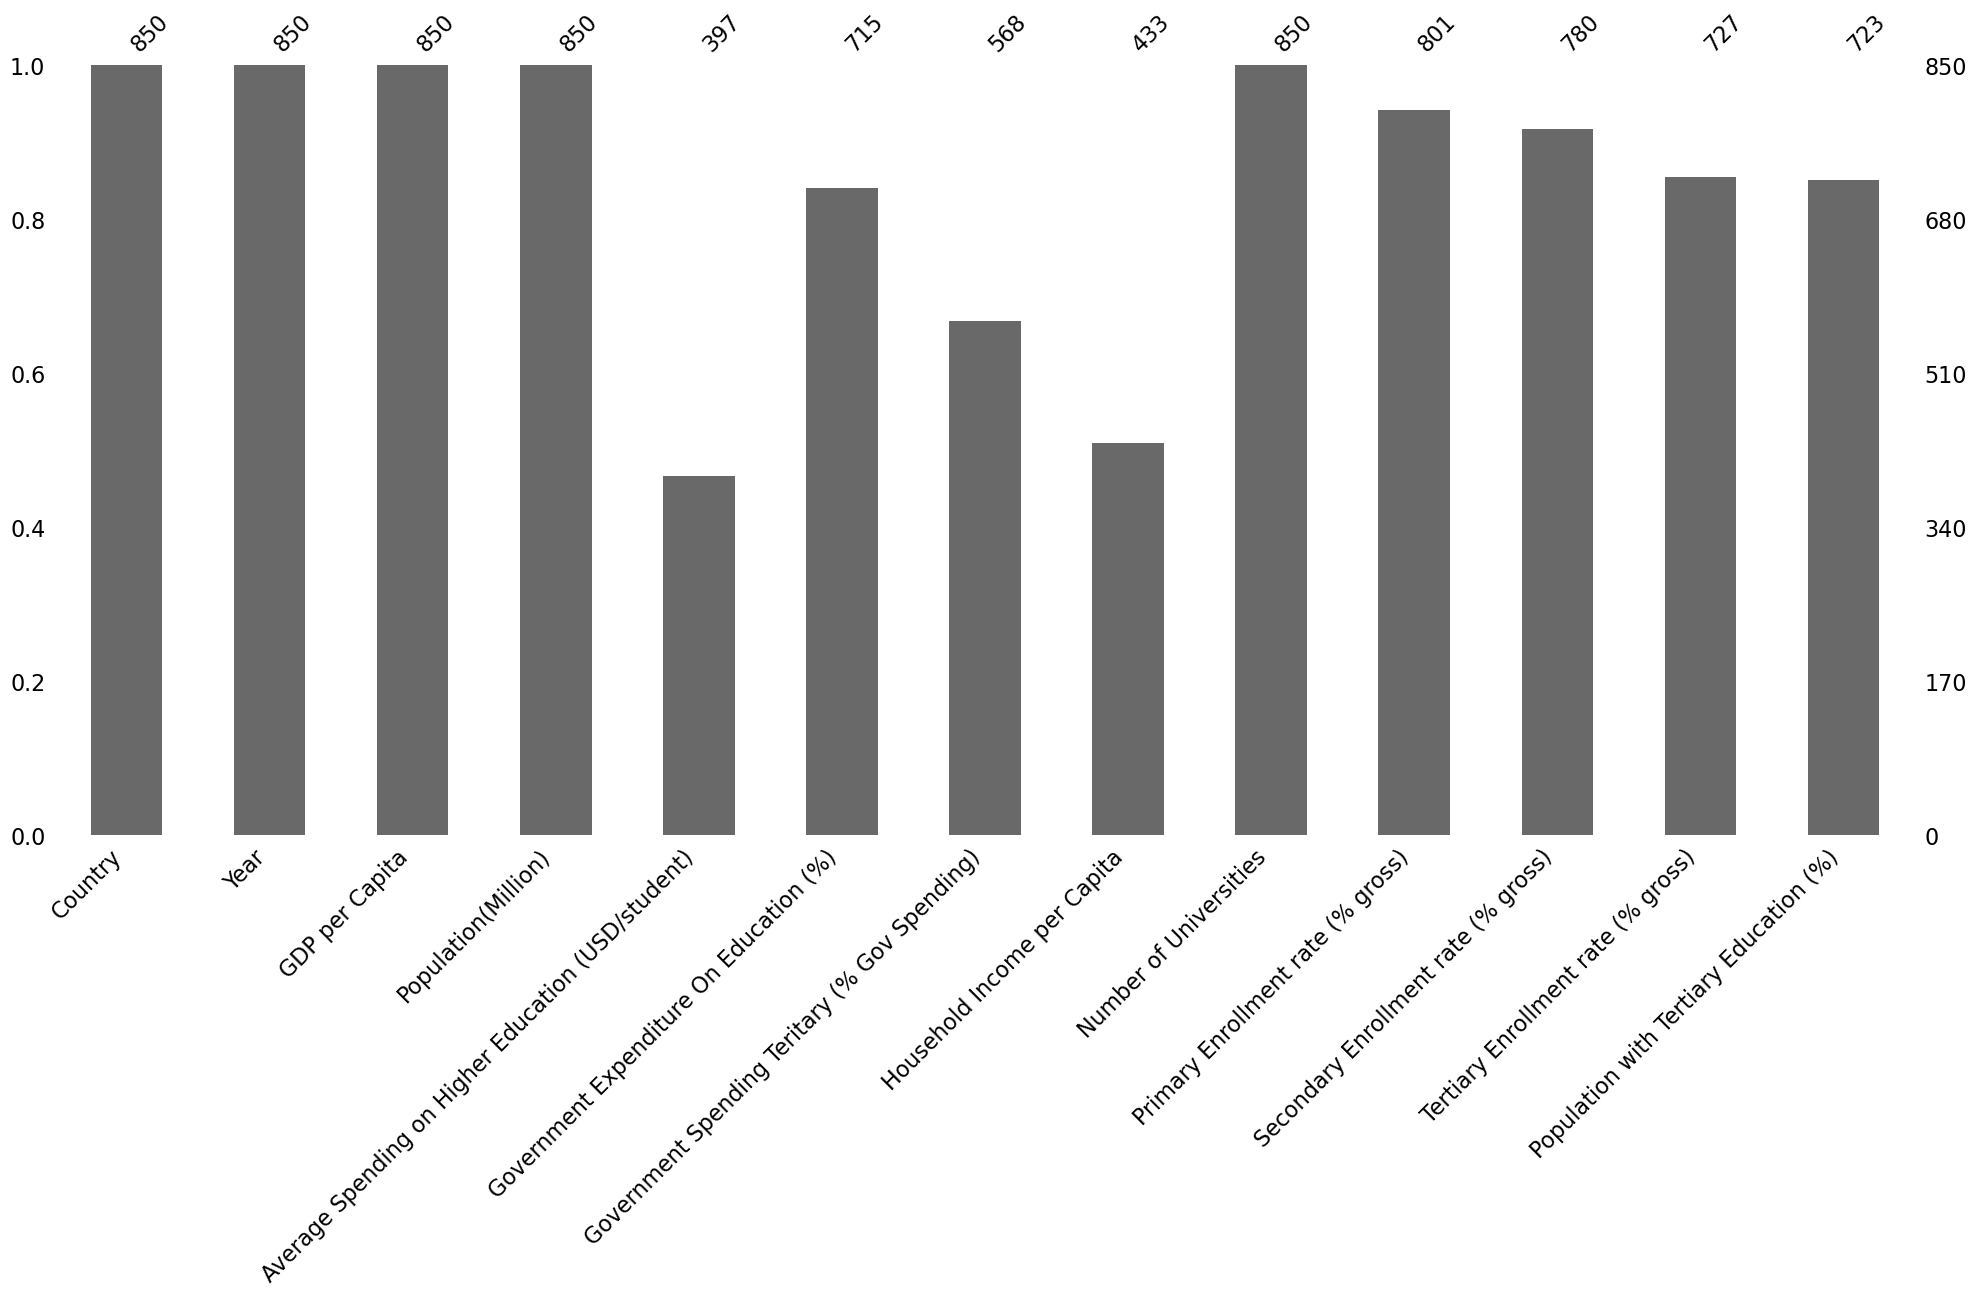

In [3]:
msno.bar(combined_df)

Our first method is to create a new dataframe that aggregates the data by country. We took the average for each attribute and grouped by column to create this new data frame. Because of this, this data frame does not take the attribute "Year" into consideration; it is not a time-series dataframe. By doing this, most of the NaNs can be eliminated.

#### Note: this description for the cleaning of this data frame can be found in our Github repository: Country Averages.ipynb (Link: https://github.com/rcherivi/Info-2950---Final-Project/blob/main/Country%20Averages.ipynb)

In [4]:
country_average_df = pd.read_csv("country_average.csv")
country_average_df.head()

,Country,GDP per Capita,Population (Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% Gov Spending),Household Income per Capita,Number of Universities,Primary Enrollment rate (% gross),Secondary Enrollment rate (% gross),Tertiary Enrollment rate (% gross),Population with Tertiary Education (%)
0,AUS,38143.8412,21.221520,17397.198571,5.063198,1.243750,35349.783486,187.0,102.619088,147.339639,100.465227,40.367922
1,AUT,39269.2264,8.311855,18464.942500,5.474380,1.500000,33898.521290,84.0,101.832554,100.166013,70.926428,35.767432
2,BEL,36588.5528,10.709564,17163.086154,5.935744,1.275000,31524.486336,142.0,102.601560,155.965544,65.986742,41.729849
3,CAN,37217.9484,33.088363,22755.057500,5.031936,1.733333,30849.148394,383.0,100.065320,106.513946,67.084939,53.696534
4,CHE,49494.9216,7.678109,24848.250000,4.900874,1.245455,38082.094754,103.0,103.458437,97.630051,48.298670,35.897165


The second method is to drop all the rows with missing values.

In [5]:
dropped_nan_df = combined_df.dropna(inplace = False)
dropped_nan_df.to_csv('dropped_nan.csv', index=False)

dropped_nan_df.head()

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% Gov Spending),Household Income per Capita,Number of Universities,Primary Enrollment rate (% gross),Secondary Enrollment rate (% gross),Tertiary Enrollment rate (% gross),Population with Tertiary Education (%)
20,AUS,2015,47226.76,23.815995,20304.37,5.31584,1.5,37553.196701,187,101.59991,157.16766,118.61086,48.466274
21,AUS,2016,50136.80,24.190907,16181.19,5.28623,1.4,38951.606333,187,100.74441,153.01320,120.96571,49.305210
22,AUS,2017,50706.49,24.594202,20273.53,5.13681,1.3,38813.739701,187,100.33898,150.31148,113.14216,51.989063
42,AUT,2012,46477.66,8.426311,16475.70,5.48040,1.8,33296.527146,84,100.59906,97.84332,78.93891,36.127834
43,AUT,2013,47936.68,8.477230,16853.00,5.54711,1.8,33971.823474,84,101.21012,99.19738,79.65540,38.666092


#### What are the observations (rows) and the attributes (columns)?
In our final data set, each observation represents a specific country (from the list of OECD countries) for the years 1995-2020. Each observation also has associated measures that relate to the country’s economic, educational, and demographic aspects for the corresponding year. 

The attributes for our final data set are: 
- “Country” (an OECD country)
- “Year” (ranges from 1995 to 2020)
- “GDP per Capita” (the sum of the gross domestic product divided by the population of the country in that certain year)
- “Population” (the total population of that country in millions of people)
- “Average Spending on Higher Education” (the average amount of money a student spends on higher education in dollars)
- “Government Expenditure On Education (%)” (the percentage of government spending on education as a percentage of the GDP)
- “Government Spending Teritary (% Gov Spending)” (the percentage of government spending on tertiary education as a percentage of overall government spending)
- “Household Income per Capita” (the average income earned by each individual in a household divided by the population of the country)
- “Number of Universities” (the total number of universities, public and private, in each country)
- “Primary Enrollment rate” (the percentage of people enrolled in primary education divided by the total population in that age group)
- “Secondary Enrollment rate” (the percentage of people enrolled in secondary education divided by the total population in that age group)
- “Tertiary Enrollment rate” (the percentage of people enrolled in tertiary education divided by the total population in that age group)
- “Population with Tertiary Education” (the percentage of total population in the age group 25-34 who have completed tertiary education)


#### Why was this dataset created? Who funded the creation of the dataset?

Our final data set was created from 4 different sources: The OECD library ( https://www.oecd-ilibrary.org/), The World Bank (https://www.worldbank.org/en/home), Webometrics (https://www.webometrics.info/en/distribution_by_country), and Our World in Data (https://ourworldindata.org/global-education). 

All the data sets from the OECD library (`gdp_df`, `population_df`, `average_spending_df`, `household_income_df`, `completed_tertiary_edu_df`) were created in part of larger datasets in order to provide reliable information about the OECD countries statistics for internal OECD users, in particular, the Economics Department, member country government agencies, and other external users in academic institutions and private enterprises. These datasets were compiled and curated by the OECD based on information collected from member countries. The data is typically gathered through surveys, censuses, and other statistical methods. Member countries report their economic data to the OECD, following standardized reporting formats and guidelines.  Because the OECD is an international organization funded by its member countries, the member countries probably funded this data collection process. 

The data sets from World Bank (`government_expenditure_df`, `gdpPerTertEdu_df`) were created to monitor and provide information on global trends to member countries and corresponding policymakers to help make informed decisions. The data set was created using information from the UNESCO Institute for Statistics and the ISCED. 

The data set `num_universities_df` was created using information from the Webometrics Ranking of World Universities. It is run and funded by a research group belonging to the Consejo Superior de Investigaciones Científicas (CSIC), the largest public research body in Spain. They created this dataset because they wanted to create a representative sample of all the universities in all countries and their rankings in the country for useful economic-related analysis. 

The data set `enrollment_rates_df`, was created by Our World in Data, a project of the Global Change Data Lab, which is a registered charity in England and Wales. It was created to show how school enrollment around the world increased dramatically in the last century. Because this research lab is associated with the University of Oxford, the data set was probably funded by it. 


#### What processes might have influenced what data was observed and recorded and what was not?

The OECD data sets rely on the member countries to voluntarily report data based on standardized methodologies and guidelines. Because of this, there could be variations in reporting practices among the member countries which can influence what data was observed and recorded and the consistency of it.

Furthermore, for most of the other data sets, the methods used to collect data were surveys and census. For both of these, the design of the questions asked and the wording can influence a respondent’s answers; different survey/census question designs may lead to variations in responses. Furthermore, because censuses aim to collect from the entire population, variations can arise if certain groups don’t fill out the census and are undercounted. There could also be challenges in reaching all the individuals in the country to fill out the census, which may impact the data observed and recorded and what was not.

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Because all the data was collected through voluntary methods of census and surveys, the people involved were aware of the data collection. They probably expected the data to be used to collect statistics about the population of that country. 


## Part 3: Preregistration Statements

### Preregistration 1: How does GDP have an impact on the completed tertiary education rates among the age groups 25-34?

- $H_0$: GDP has a greater impact on completed tertiary education rates among the age group 25-34 compared to other factors in our model.
- $H_A$: GDP has no impact on completed tertiary education rates among the age group 25-34 compared to the other factors in our model.


For the first Pre-registration question, we wanted to analyze whether GDP has an impact on completed tertiary education rates or not compared to the other factors in our model. We believe that the GDP of a country has the highest impact on education rates. We think that higher education has a lot to do with affordability. The GDP per capita value tells us a lot about one’s economic status and whether or not one will be able to afford to pursue a higher education. In addition, if we found GDP per capita to be a large influence on education levels, it would create the hypothesis that increasing GDP per captia through economic measures can effectively assist education level. In addition, as a part of our general question about the factors that impact education levels, GDP per captia plays a huge role in other factors such as household income and government spending as a percentage of GDP. Because of this, we decided to analyze this preregistration question. Observing both how GDP performs in the full model and the isolated model with just itself can allow us to understand both if GDP plays a role and how large of a role it plays in tertiary education levels.

### Preregistration 2: How does government spending on education impact the completed tertiary education rates among the age groups 25-34?

- $H_0$: The rate of completed higher education stays the same with higher government spending on education.
- $H_A$: The rate of completed higher education increases with higher government spending on education.


For the second Pre-registration question, we wanted to see whether government spending on education has an impact on completed tertiary education rates or not. Another factor that we think is important in enabling people to attain a tertiary education is the amount the government spends on education. If a government spends more money on education, it usually indicates that there are more people being educated. People who weren’t able to afford this higher education might be able to afford it if the government spends more money on education. However, this might not always be the case: spending a higher proportion of GDP on education doesn't necessarily ensure that a country's population is more educated. Because of this, we wanted to investigate this question in order to figure out whether there would be a correlation. 


For both these models, we will accept a p-value (indicating the probability of our observed data given that our null hypothesis is true) that is less than 0.05 from our linear regression. 

## Part 4: Data Analysis

In this section, we explored the data to see what trends we could see and particular variables stand out with a high correlation with the rate of tertiary completion among 24-35 year olds. Therefore, we created graphs isolating variables of interest and plotting them against our response variable, which is the rate of tertiary completion among 24-35 year olds. Our goal for this section is to gain intuition about the data and what to expect for factors that have a greater correlation with tertiary education rates. This is because our model includes variables that are closely related but still significant to our model, such as GDP per capita, Percentage of GDP spent on Education, and Percentage of Government Spending on Tertiary Education. By looking at each variable individually with the response variable prior to creating any regression model, if there is multicollinearity and it impacts the coefficients of the regression model, we would have some intuition to spot the oddities.

First, we want to look at the change in GDP over time in the countries. The goal of the following two graphs is to see if there is a correlation between GDP per capita and tertiary, which countries would we expect there to be a higher tertiary education. If we don’t see countries with high GDP per capita values have high tertiary education values it would provide more insight that perhaps the productivity of a country doesn’t necessarily mean a higher proportion of the population with a tertiary education. This may provide valuable information both for our preregistration question about the impact of GDP on tertiary education levels and for insight into how education may not be a good indicator of a country’s economic performance.

### How does the GDP per Capita of OECD countries change over time?

According to the WorldBank, GDP per captia is a measure of economic growth in that it measures the average value of output per person, which can indirectly provide information about the poverty situation and general income of the country. The formula for GDP per capita is the real GDP divided by Population – where the real GDP is an inflation-adjusted measure of the value of all goods and services produced in an economy. Knowing this can impact the number of completed tertiary education because the completion of this may depend on whether families or individuals can afford to remain enrolled in these programs.

Our goal for this focus question is to see if there is even a relationship between GDP per capita and tertiary education levels. If the graphs displays the data points in a very scattered manner, it will inform us that we should expect there to be no relationship between the two and that a country's economic well-being does not impact the tertiary education rates. 

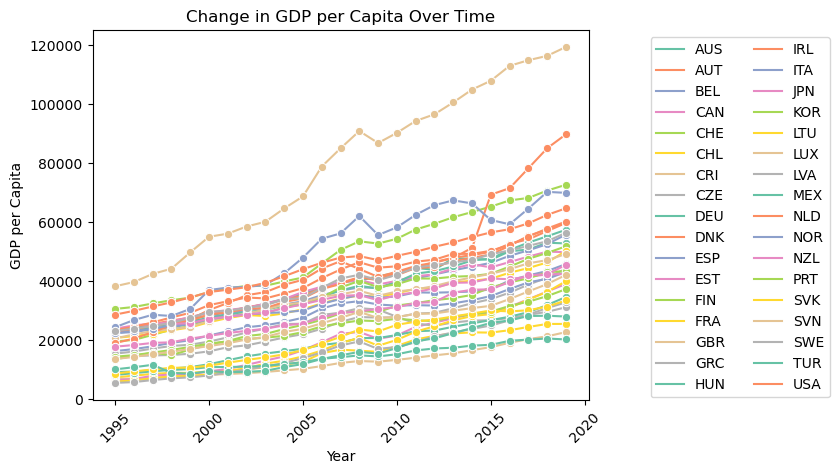

In [6]:
sns.lineplot(data = combined_df, x = "Year", y = "GDP per Capita", 
            hue = "Country", 
            marker = "o", palette = "Set2");
plt.legend(bbox_to_anchor = (1.5,1), loc = 'upper right', ncol = 2);
plt.xticks(rotation = 45);
plt.title ("Change in GDP per Capita Over Time");

Although the graph is colored based on the country it represents, the large amount of countries makes it difficult to decipher which line is for which country.

In the graph, a line that stood out to us was the orange country that always had the highest GDP per capital. Therefore, we want to isolate the country this line represents.

In [7]:
gdp_col = combined_df["GDP per Capita"]
max_gdp = gdp_col.max()
count_max_gdp = combined_df.loc[gdp_col == max_gdp]["Country"]
print ("The country with highest gdp per capita is",
       count_max_gdp.to_string(index = False))

The country with highest gdp per capita is LUX


Using this graph, we can see a general linear increase in GDP per Capita. In addition, we can also observe that Luxembourg has the highest GDP per capita for all 25 years of our analysis. This is quite interesting given that Luxembourg is a small country that is mostly rural land with slighly over 640,000 people. 

However, since there are so many countries, it can be difficult to uncover any specific details.  

To help us better divide and analyze the data, we are going to create a new column that indicates the continent that the country is from. Using https://en.wikipedia.org/wiki/OECD, we grouped them based on geographic location. Since most countries are from Europe, we merged the Americas together and the Asia and Oceania countries together.

In [8]:
cont_map = {"AUS" : "OceaAsia","AUT":"Europe","BEL":"Europe",
            "CAN":"Americas", "CHL":"Americas", "COL":"Americas",
            "CRI":"Americas","CZE":"Europe", 
            "DNK":"Europe", "EST": "Europe", 
            "FIN":"Europe", "FRA":"Europe", "DEU":"Europe", 
            "GRC":"Europe", "HUN":"Europe", "ISL":"Europe", 
            "IRL":"Europe","ISR":"OceaAsia", "ITA":"Europe", 
            "JPN":"OceaAsia", "KOR":"OceaAsia", 
            "LVA":"Europe", "LTU":"Europe", "LUX":"Europe", 
            "MEX":"Americas", "NLD":"Europe", "NZL":"OceaAsia",
            "NOR":"Europe", "POL":"Europe", "PRT":"Europe", 
            "SVK":"Europe","SVN":"Europe","ESP":"Europe",
            "SWE":"Europe","CHE":"Europe", "TUR":"OceaAsia",
            "GBR":"Europe","USA":"Americas"}

combined_df["Geographic Location"] = combined_df["Country"].map(cont_map)

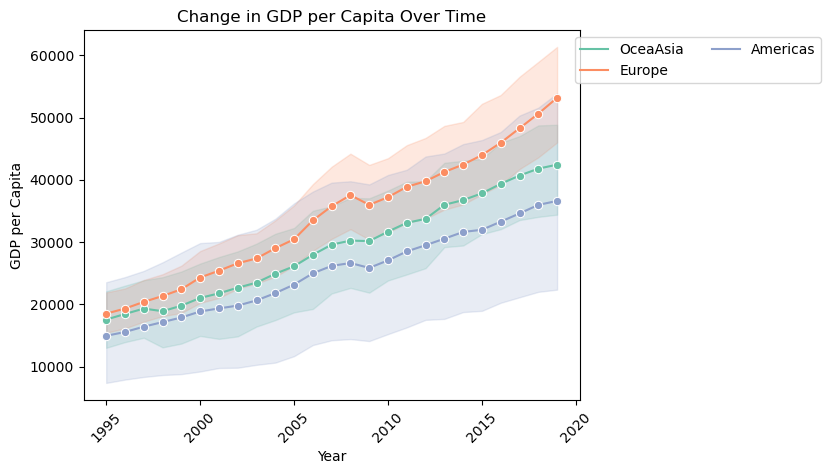

In [9]:
sns.lineplot(data = combined_df, x = "Year", y = "GDP per Capita", 
            hue = "Geographic Location", 
            marker = "o", palette = "Set2");
plt.legend(bbox_to_anchor = (1.5,1), loc = 'upper right', ncol = 2);
plt.xticks(rotation = 45);
plt.title ("Change in GDP per Capita Over Time");

Again, as the years pass by, we spot a general increase in GDP per captia.

With the  increasing trend, we would expect there to be a general increase in the percentage of people who completed tertiary education, assuming all else is equal. Specifically, the countries in Europe seem to have a strong economy. However, this method of aggregating based on geographic location can lead to bias. Given that most of the OECD countries are European countries – 26 of the total 38 countries are in fact European countries– the other regions are will have less countries in their own categories. This will make regions with less countries like Oceania and Asia and the Americas be more vulnerable to extremely large and small GDP per capita values. For instance, the GDP per capita for the USA in 2019 is approximately 6 times the GDP per capita for Colombia in 2019. In the graph, we can see this. Even though the GDP for the USA is extremely high, the average GDP per capita line for the Americas in 2019 is near 25000, which indicates that there a lot of countries in the Americas that have low GDP per capita values, like Colombia, that bring the average GDP per capita down. 


This detail is significant in showing that the findings of this study, conclusive or not, may not be very insightful about American and OceaAsia countries because the small number of countries that are included in this analysis compared to the overall population. 

In [10]:
amers_query = """
            SELECT Country, Year, "GDP per Capita",
            "Geographic Location"
            FROM combined_df
            WHERE ("Geographic Location" = 'Americas') AND (Year = 2019)
            ORDER BY "GDP per Capita"
            """

americas_19 = duckdb.sql(amers_query).df()
print (americas_19)

oceaAsia_query = """
            SELECT Country, Year, "GDP per Capita",
            "Geographic Location"
            FROM combined_df
            WHERE ("Geographic Location" = 'OceaAsia') AND (Year = 2019)
            ORDER BY "GDP per Capita"
            """

oceaAsia_19 = duckdb.sql(oceaAsia_query).df()
print (oceaAsia_19)

  Country  Year  GDP per Capita Geographic Location
0     MEX  2019        20244.56            Americas
1     CRI  2019        22739.24            Americas
2     CHL  2019        25509.45            Americas
3     CAN  2019        49832.41            Americas
4     USA  2019        64690.27            Americas
  Country  Year  GDP per Capita Geographic Location
0     TUR  2019        28011.32            OceaAsia
1     JPN  2019        42427.13            OceaAsia
2     KOR  2019        43410.15            OceaAsia
3     NZL  2019        45518.31            OceaAsia
4     AUS  2019        52785.25            OceaAsia


### Do increases in GDP per Capita correlate with increases percentage of population with tertiary education?

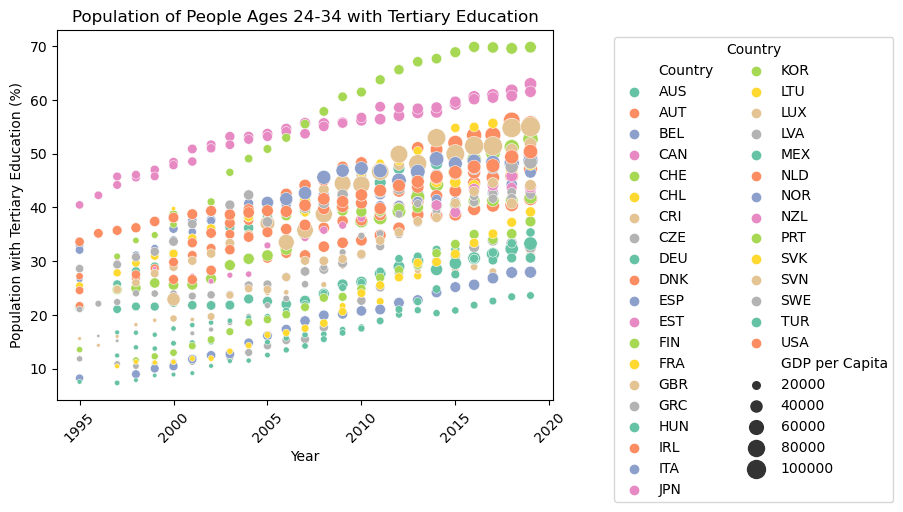

In [11]:
sns.scatterplot(data = combined_df, x = "Year", 
            y = "Population with Tertiary Education (%)", 
            hue = "Country", marker = "o", 
            palette = "Set2", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', 
           ncol = 2, title = "Country");
plt.xticks(rotation = 45);
plt.title ("Population of People Ages 24-34 with Tertiary Education");

This graph shows the relationship between time, percent of population of ages 24-34 with a tertiary education, GDP per capita, and the country.

As mentioned in the previous observation about the relationship between GDP per capita and year, for most, if not all, the countries show a positive change in GDP per capita over time. This graph also shows this relationship, with the increase in time, there is a gradual increase in dot size, which is based on the GDP per capita. 

In addition, bigger dots, which means larger GDP per capita, are correlated to a higher level of tertiary education. Generally,  countries with over 30% of their population having tertiary education are denoted by a larger dot compared to those below the 30% line. In the 1990s when the dots are all small, the range of the population with tertiary education among all the countries is between 5% and 40%. However, in 2020, the dots grew bigger and the range of the population with tertiary education among all the countries is between 20% and 70%. Although GDP per Capita is positively correlated with the percentage of the population with tertiary education, this does not necessarily mean that a country’s GDP per Capita plays a role in the percentage of the population with tertiary education. We will investigate this later when we run linear regression models and evaluate the significance of the input variables. 

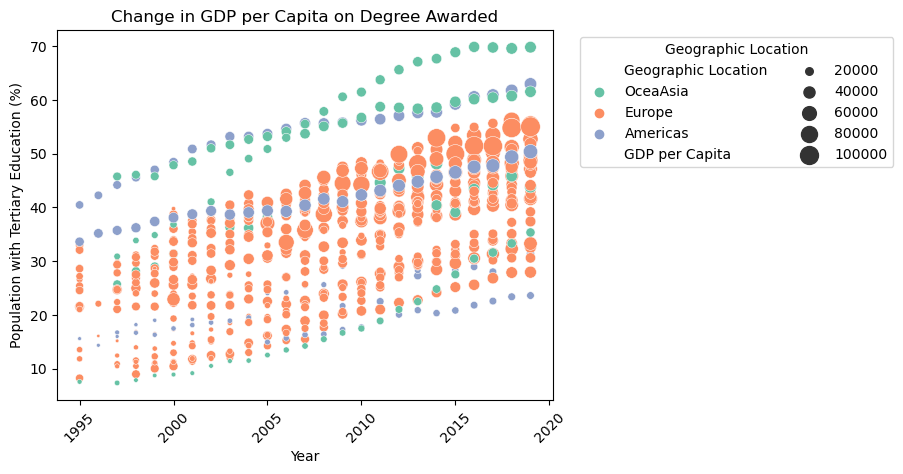

In [12]:
sns.scatterplot(data = combined_df, x = "Year", 
            y = "Population with Tertiary Education (%)", 
            hue = "Geographic Location", marker = "o", 
            palette = "Set2", size = "GDP per Capita", 
            sizes = (5, 200));

plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Geographic Location");
plt.xticks(rotation = 45);
plt.title ("Change in GDP per Capita on Degree Awarded");

This graph groups the data points based on geographic location because we wanted to see if geographic location possibly plays a role in the percentage of the population with tertiary education. Looking at this graph, we can see there is a large portion in the middle of data points from European countries. However, the other locations are quite scattered and have fewer data points. This is because the OECD is mainly composed of countries that describe themselves as committed to democracy and the market economy. This graph is significant in showing the limitation of this dataset in that not only does it not have thorough data for all the years but the observations made cannot be extended to all countries with a high accuracy. However, one interesting thing that this graph shows is the general high tertiary education levels in Japan and Korea. Using our prior knowledge, there is a high pressure and emphasis on a higher education countries like Japan and Korea in that there are families who borrow loans to send children to cram school. This graph shows that and also reveals that education levels may also be dependent on societal emphasis and pressure; however, in our model, there is a limitation given that we can't really quantify culture and societial value of higher education. 

In [13]:
y_col = combined_df["Population with Tertiary Education (%)"]
max_y = y_col.max()

count_max_y = combined_df.loc[y_col == max_y]["Country"]
print ("The country with highest population with tertiary education is",
       count_max_y.to_string(index = False))
print("The percent of population with", 
       "Tertiary Education for South Korea in 2019 is",
       max_y)

kor_query2 = """
              SELECT Country, Year, "GDP per Capita"
              FROM combined_df
              WHERE (Country = 'KOR')
              AND (Year = 2019)
              """

kor_19 = duckdb.sql(kor_query2).df()
kor_19_gdp = kor_19['GDP per Capita'].to_string(index=False)
print ("The GDP per capita for S.Korea in 2019 is", kor_19_gdp)

lux_query = """
              SELECT Country, Year, 
              "Population with Tertiary Education (%)"
              FROM combined_df
              WHERE (Country = 'LUX')
              AND (Year = 2019)
              """

lux_19 = duckdb.sql(lux_query).df()
lux_19_gdp = lux_19['Population with Tertiary Education (%)'].to_string(index=False)
print ("The percent of population with", 
       "Tertiary Education for Luxembourg in 2019 is",
       lux_19_gdp)

The country with highest population with tertiary education is KOR
The percent of population with Tertiary Education for South Korea in 2019 is 69.851555
The GDP per capita for S.Korea in 2019 is 43410.15
The percent of population with Tertiary Education for Luxembourg in 2019 is 54.989532


But this graph also shows evidence that GDP perhaps is not the largest factor in population with teritary, given that countries like South Korea with a relative small GDP per Capita of only 43410.15 has such a high population of people with tertiary education (69.85%). In our analysis of the GDP per captia for countries, we pointed out that Luxembourg has the all-time highest GDP per captia. However, the percentage of population with tertiary education is significantly less than the percentage for South Korea. 

### Does the number of universities impact the population of people with tertiary education?

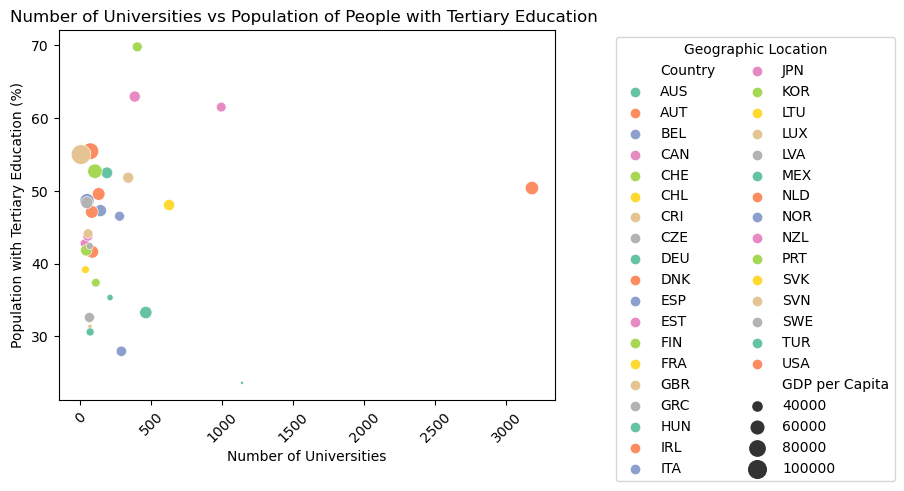

In [14]:
pop_tert_edu19 = combined_df.loc[combined_df["Year"] == 2019]
sns.scatterplot(data = pop_tert_edu19, x = "Number of Universities", 
            y = "Population with Tertiary Education (%)", 
            hue = "Country", marker = "o", 
            palette = "Set2", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Geographic Location");
plt.xticks(rotation = 45);
plt.title ("Number of Universities vs Population of People with Tertiary Education ");

This graph shows the relationship between the country's total number of univerities and the percentage of the population with tertiary education. The graph shows that most countries have fewer than 500 universities, with USA being a notable outlier (over 3000 universities). 

We expected that as the number of universities increase, there would be a higher percentage of people with tertiary education. However, based on our graph, there doesn't seem to be a large correlation between the number of universities and the population of people with tertiary education. For instance, there are Japan and Mexico both has approximately 1000 universities, but their tertiary education data is very different– Japan has a tertiary education level of approximately 61.51% and Mexico has a tertiary education level of approximately 23.59%. This again hints at the point made above about the influence of societial value of a higher education. It may be that a country has high productivity and is economically stable, but if people can obtain a job without a higher education and there is no pressure to do so by society and family members, there is a chance that the population teritary education rates will be lower.

In [15]:
query = """
        SELECT Country, Year, "Number of Universities", 
        "Population with Tertiary Education (%)"
        FROM combined_df
        WHERE (("Number of Universities" >= 900)
        AND ("Number of Universities" <= 1500))
        AND Year = 2019;
        """

comp_1000uni = duckdb.sql(query).df()
print (comp_1000uni)

  Country  Year  Number of Universities  \
0     JPN  2019                     992   
1     MEX  2019                    1139   

   Population with Tertiary Education (%)  
0                               61.514194  
1                               23.587111  


### What is the relationship between enrollment rates by grade and percentage of population with tertiary education? Are enrollment rates by grade indicative of percentage of population with tertiary education?

For these graphs that show the relationship between enrollment and population of people with tertiary education, there domain or the enrollment rates decreased as the level of education increased. We also noticed the trend that the graph for the primary enrollment rate, there is not a very clear relationship between the enrollment rate and the percentage of total population, whereas the other two graphs show an increasing trend between enrollment rates and percentage of total population with tertiary education. This may be due to the fact that in between the time of primary school and tertiary school, there may be other factors that minizes the impact of primary enrollment on the final percentage of total population with tertiary education.

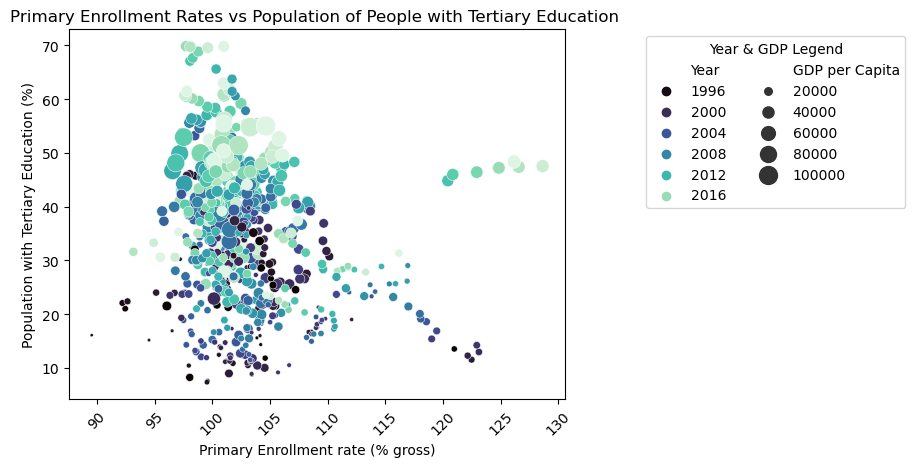

In [16]:
sns.scatterplot(data = combined_df, x = "Primary Enrollment rate (% gross)", 
            y = "Population with Tertiary Education (%)", 
            hue = "Year", marker = "o", 
            palette = "mako", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Year & GDP Legend");
plt.xticks(rotation = 45);
plt.title ("Primary Enrollment Rates vs Population of People with Tertiary Education ");

This graph shows the relationship between rates of enrollment in primary education and the percentage of the population with tertiary education.

The graph above shows that from 1995 to 2005, enrollment rates in primary education has generally stayed the same. We would expect this, since primary education is typically mandated by law in many countries. However, the plots for more recent years, indicated by the lighter colors, correspond to higher percentages of the population with tertiary education. This suggests that the general increase in the percentage of population with tertiary education across OECD countries is not dependent on primary enrollment rates.

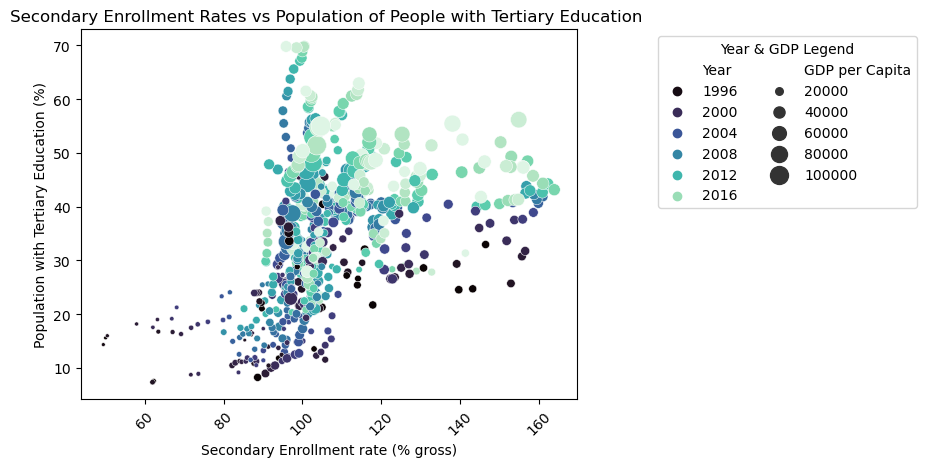

In [17]:
sns.scatterplot(data = combined_df, x = "Secondary Enrollment rate (% gross)", 
            y = "Population with Tertiary Education (%)", 
            hue = "Year", marker = "o", 
            palette = "mako", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Year & GDP Legend");
plt.xticks(rotation = 45);
plt.title ("Secondary Enrollment Rates vs Population of People with Tertiary Education ");

This graph above shows the relationship between rates of enrollment in secondary education and the percentage of the population with tertiary education. There is a positive but weak correlation between the two variables. We would expect there to be more of a positive correlation compared to the previous graph, as secondary education often serves as a critical pathway to tertiary education.

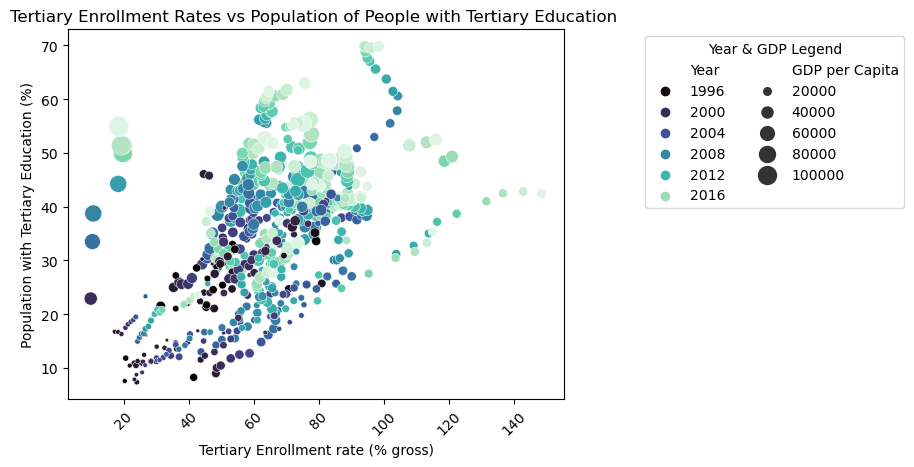

In [18]:
sns.scatterplot(data = combined_df, x = "Tertiary Enrollment rate (% gross)", 
            y = "Population with Tertiary Education (%)", 
            hue = "Year", marker = "o", 
            palette = "mako", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Year & GDP Legend");
plt.xticks(rotation = 45);
plt.title ("Tertiary Enrollment Rates vs Population of People with Tertiary Education ");

This graph above shows the relationship between rates of enrollment in tertiary education and the percepntage of the population with tertiary education. There is a positive correlation, which intuitively makes sense as as individuals enrolling in tertiary education contribute to the percentage of the population with tertiary education.

Of the three grade levels, this graph shows the greatest amount of correlation between enrollment rates and tertiary education rates. This makes sense because many countries requires its residents to complete a certain amount of year of education to ensure a literacy rates and the population's ability to contribute to the workforce, but the completion of a higher education is not required. 

There is a subset of data points that has low enrollment rates but relatively high percentage of total population with tertiary education. This is interesting because for countries with lower enrollment rates, we expected there to be a lower population with tertiary education– even if the percentage of total population with tertiary education is not for the immediate graduating population but for ages 24 - 34. To add on, the GDP for this subset of abnormal data shown in the last graph has a relatively large GDP per Capita, which signals that countries in this subset is economically strong and people have high purchasing power. One possibility may be that the resources avaliable for students working to complete their tertiary education may not be sufficient in that they either drop out and/or take longer to complete their degree. This lead us to be slightly concerned about the coherence of our dataset. Although websites we used to obtain our datasets are world data databases, it can be possible that the methodology is slightly different leading to somewhat contradicting data points.

This graph also shows another subset of data points that has high enrollment rates of over 120% but percentage of total population with tertiary education of below 50%. This is not as surprising given that students have the ability to not finish their degree program. But it provides insight to our research in that although higher tertiary education enrollment rate may impact the population with tertiary education from ages 24 - 34, the may be other factors like average cost of attendance and resources available that impact the final number of graduates.

### How does government spending impact tertiary education levels?

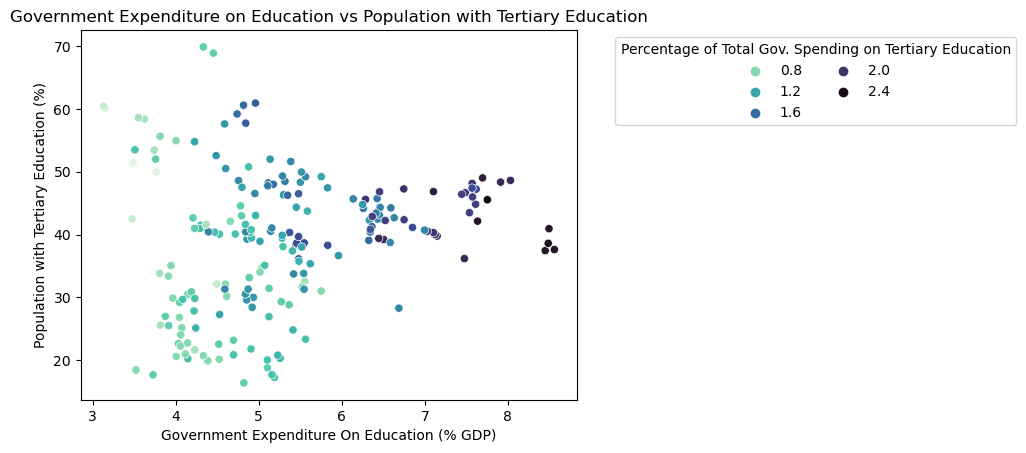

In [19]:
#Using the dropped_nan_df

sns.scatterplot(data = dropped_nan_df, x = "Government Expenditure On Education (%)",
                y = "Population with Tertiary Education (%)",
                hue = "Government Spending Teritary (% Gov Spending)", 
                marker = "o", palette = "mako_r");

plt.legend(bbox_to_anchor = (1.9,1), 
           loc = 'upper right', ncol = 2,
          title = "Percentage of Total Gov. Spending on Tertiary Education");

plt.title("Government Expenditure on Education vs Population with Tertiary Education");
plt.xlabel("Government Expenditure On Education (% GDP)");

This graphs shows the relationship between government expenditure on education as a percentage of GDP (the x value), government expenditure on tertiary education as a percentage of total government spending (the hue; as the percentage of government spending that goes to tertiary education increases, the color gets darker and vice verse), and the percentage of population between the age of 24 to 35 that has obtained a tertiary education. 

We initially expected there to be a strong correlation between government expenditures on education and the proportion of people with a tertiary education. We also expected there to be a strong correlation between government expenditures on tertiary education and the proportion of people with a tertiary education. Looking at the graph as a whole, there doesn't seem to be an obvious increasing or decreasing trend in proportion of people with a tertiary education as the government expenditures on education changes. Similarly, there doesn't seem to be an trend between government expenditures on tertiary education and proportion of people with tertiary degrees. 

### Can we model completed tertiary education rates using all the input variables in our dataframe? How accurate is this model in predicting the percentage of the population with tertiary education?

Before creating the model, we will first normalize the input variables. Normalization ensures that all input features have the same scale. This is important because linear regression is sensitive to the scale of input features. Features with larger scales may have a disproportionately larger impact on the model, potentially overshadowing the contributions of features with smaller scales. In particular, for our model, we have some columes that are percentages and some values that are in the thousands and higher. Without normalization, this can lead to undesired consquences such as small coefficients for factors and inconclusive results. To do this, we will create a function Normalizer that takes a set of columns and normalizes them using 'StandardScaler' from scikit-learn, and apply the function to the input variables. StandardScaler standardizes the features by removing the mean and scaling to unit variance. 

Then, we will split the data into training and testing sets. We will use the training set to train the model and the testing set to evaluate its performance. Following convention, the test_size parameter is set to 30%, meaning 70% of the data will be used for training and 30% for testing. The 'random_state' parameter ensures reproducibility.

In [20]:
input_vars = ["GDP per Capita", "Population (Million)", "Average Spending on Higher Education (USD/student)", 
              "Government Expenditure On Education (%)", "Government Spending Teritary (% Gov Spending)",
              "Household Income per Capita", "Number of Universities", "Primary Enrollment rate (% gross)", 
              "Secondary Enrollment rate (% gross)", "Tertiary Enrollment rate (% gross)"]
def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))
x = Normalizer(country_average_df[input_vars].values)
y = country_average_df["Population with Tertiary Education (%)"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2950)
model = LinearRegression().fit(X_train, y_train)

Next, we will calculate the mean squared error (MSE) and root mean squared error (RMSE) on the testing and training data. These metrics help to evaluate how well the model's predictions align with the actual values in the dataset. A lower MSE and RMSE indicates better model performance.

In [21]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Mean Squared Error on Training Data: " + str(mse_train))
print("Mean Squared Error on Testing data: " + str(mse_test))
print("Root Mean Squared Error on Training Data: " + str(rmse_train))
print("Root Mean Squared Error on Testing Data: " + str(rmse_test))

Mean Squared Error on Training Data: 21.614424756673035
Mean Squared Error on Testing data: 149.78274237451814
Root Mean Squared Error on Training Data: 4.649131613180362
Root Mean Squared Error on Testing Data: 12.238575994555827


The model appears to perform well on the training data, as evidenced by the low MSE and RMSE. However, there is a noticeable increase in both MSE and RMSE when evaluating the model on the testing data, indicating a potential lack of generalization. The model may be overfitting to the training data, as it does not generalize as well to new, unseen data. Since we are using the average values for each country, this means we only have 34 countries (as mentioned in the data cleaning section, we had to remove 4 countries because they had no value for any of the years). After the train and test split, the size of each is very small and how the split is done can result in very different MSE and RMSE because the smaller the data set, the more vulnerable the model is to outliers and oddities. With this in mind, we will look to build models and analyze models using two different data frames– the country averages and the NaNs dropped (the rows with at least 1 NaNs are dropped from the original combined dataframe). By doing this, we hope to get a better insight to the correlation between each independent variable and the tertiary education levels. 

## Part 5

In this section, we will look to conduct tests to answer our preregistration questions and our general question of the variables that are useful to predicting the proportion of the population with tertiary education in the age group 24 -35 years old.

For preregistration 1 and our general research question, we are looking to find effective variables that has an impact on the proportion of the population with tertiary education in the age group 24 -35 years old. Therefore, to find the better model, we decided to use AIC to compare the possible models of our interest. The data frame that we used for part of analysis is the aggregated data that uses the mean value for each country across all years. To see more details on how this data frame is generated, please refer to the appendix section for the procedure we used to generate the aggregated.

To provide some background information, the AIC(Akaike’s Information Criterion) formula uses the log likelihood (which measures how well the model fits the data) and the number of parameters [1]. The log-likelihood is the log function applied to maximum likelihood function, which estimates the values of the parameters that would maximize the likelihood of the response value being observed[2].

The formula for AIC is AIC = -2(log-likelihood) + 2K where k is the number of parameters including the constant and log-likelihood is the log maximum likelihood function.

Using the AIC, we can better compare the ability of the models to predict the response value. From the formula we can see that models with a lower AIC is better because we want the model that uses the least amount of variables while having parameters that explains the data well. 

There are some limitations to using the AIC. Because the AIC is based on asymptotic theory, assuming large sample sizes. In cases where the sample size is small, AIC might not perform as effectively. Despite this, since our research questions involve the selection of the most appropriate model to conduct hypothesis tests, the AIC serves as a valuable tool in this context because it makes it easier to find compare different models to the same data set and pick the best one out of them.

In addition to GDP per capita which measures the spread of GDP among the country’s population and provides us with a sense of the economic ability of people to attain a higher education, we also hypothesized that government spending towards education would have a positive impact on the tertiary education data. This is because as educational costs continue to rise over the years, public investment (government) in education is vital in reducing financial barriers, especially for those who cannot afford to pursue tertiary education. Therefore, for our preregistration 2, we created a model to analyze the relationship between the government spending on education as a percentage of the GDP and the rate of completing higher education among 24-35 year olds.

Sources:

https://www.statisticshowto.com/akaikes-information-criterion/
https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1


## Part 5.1:   Preregistration 1 

How does GDP have an impact on the completed tertiary education rates among the age groups 25-34?

- $H_0$: GDP has a greater impact on completed tertiary education rates among the age group 25-34 compared to other factors in our model.
- $H_A$: GDP has no impact on completed tertiary education rates among the age group 25-34 compared to the other factors in our model.

#### Using the average_country_df:

We will use OLS regression to model the percentage of the population with tertiary education using all input variables, find the p-value for each input variable and assess whether certain variables may be significant predictors of the percentage of the population with tertiary education. 

In [22]:
input_vars = ["GDP per Capita", "Population (Million)",
              "Average Spending on Higher Education (USD/student)", 
              "Government Expenditure On Education (%)",
              "Government Spending Teritary (% Gov Spending)",
              "Household Income per Capita", "Number of Universities",
              "Primary Enrollment rate (% gross)", 
              "Secondary Enrollment rate (% gross)",
              "Tertiary Enrollment rate (% gross)"]
def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))
x = Normalizer(country_average_df[input_vars].values)
y = country_average_df["Population with Tertiary Education (%)"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Population with Tertiary Education (%)   R-squared:                       0.598
Model:                                                OLS   Adj. R-squared:                  0.424
Method:                                     Least Squares   F-statistic:                     3.428
Date:                                    Mon, 04 Dec 2023   Prob (F-statistic):            0.00702
Time:                                            15:35:40   Log-Likelihood:                -112.53
No. Observations:                                      34   AIC:                             247.1
Df Residuals:                                          23   BIC:                             263.8
Df Model:                                              10                                         
Covariance Type:                                nonrobust                                         
          

Analyzing the p-values from the model, it suggests that the variables corresponding to `Average Spending on Higher Education (USD/student)`(x3) and `Tertiary Enrollment rate (% gross)`(x10) exhibit statistical significance at the 5% level. However, the insignificance of `GDP per Capita` (x1) may be influenced by the presence of noise and the considerable number of variables, potentially diluting the explained variance associated with GDP per capita. To better comprehend the relationship between GDP per capita and the percentage of the population with tertiary education and mitigate the impact of other factors, we will create another regression model using only GDP per capita as our input variable. We will do the same thing with variables x3 and x10 and compare their AIC values.

In [23]:
x = Normalizer(country_average_df["GDP per Capita"].values.reshape(-1, 1))
x = sm.add_constant(x)
y = country_average_df["Population with Tertiary Education (%)"]
model = sm.OLS(y, x).fit()
print ("The p-value for GDP per Capita for the GDP per Capita only model is", model.pvalues[1])
print("The AIC for the GDP per Capita model is", model.aic)

The p-value for GDP per Capita for the GDP per Capita only model is 0.001882759766479588
The AIC for the GDP per Capita model is 249.65615860079308


In [24]:
x_val = country_average_df["Average Spending on Higher Education (USD/student)"].values.reshape(-1, 1)
x = Normalizer(x_val)
x = sm.add_constant(x)
y = country_average_df["Population with Tertiary Education (%)"].values.reshape(-1, 1)
model = sm.OLS(y, x).fit()
print ("The p-value for Average Spending on Higher Education (USD/student)", "for the Average Spending ",
       "on Higher Education (USD/student) only model is", model.pvalues[1])
print("The AIC for Average Spending on Higher Education (USD/student) model is", model.aic)

The p-value for Average Spending on Higher Education (USD/student) for the Average Spending  on Higher Education (USD/student) only model is 0.0039475765181688745
The AIC for Average Spending on Higher Education (USD/student) model is 251.1149259942581


In [25]:
x = Normalizer(country_average_df["Tertiary Enrollment rate (% gross)"].values.reshape(-1, 1))
x = sm.add_constant(x)
y = country_average_df["Population with Tertiary Education (%)"]
model = sm.OLS(y, x).fit()
print ("The p-value for Tertiary Enrollment rate (% gross) for the Tertiary Enrollment rate (% gross)", 
       "only model is", model.pvalues[1])
print("The AIC for the Tertiary Enrollment rate (% gross) model is", model.aic)

The p-value for Tertiary Enrollment rate (% gross) for the Tertiary Enrollment rate (% gross) only model is 0.029320763847468248
The AIC for the Tertiary Enrollment rate (% gross) model is 254.9539023064683


Comparing the three variables' AIC values, the variable `GDP per Capita` has the lowest AIC at 255.9. This suggests that in the context of explaining the variation in the percentage of the population with tertiary education, the model with `GDP per Capita` as the sole predictor provides the best balance between goodness of fit and model complexity. This suggests support for hypothesis 1, which posits that GDP has a greater impact on completed tertiary education rates compared to other factors in our model. During this part, we learned that as with our exploratory analysis, there is a correlation between GDP per Capita and tertiary education levels. Furthermore, given that the AIC and p-values change after dropping the other variables, this can go to show that there is likely a very strong connectedness between the factors and GDP per Capita is the most representative of the factors that we analyzed. Therefore, based on this brief analysis, GDP per Capita seems to be a good indicator of education levels and changes in GDP per Capita levels will likely correlation with higher tertiary education levels. We will continue this analysis in our general question.

#### Using the dropped_nans_df

We will repeat this process above, replacing the `country_average_df` with the `dropped_nans_df`.

In [26]:
input_vars = ["GDP per Capita","Population(Million)",
              "Average Spending on Higher Education (USD/student)", 
              "Government Expenditure On Education (%)",
              "Government Spending Teritary (% Gov Spending)",
              "Household Income per Capita", "Number of Universities",
              "Primary Enrollment rate (% gross)", 
              "Secondary Enrollment rate (% gross)",
              "Tertiary Enrollment rate (% gross)"]

def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))

x = Normalizer(dropped_nan_df[input_vars].values)
y = dropped_nan_df["Population with Tertiary Education (%)"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Population with Tertiary Education (%)   R-squared:                       0.563
Model:                                                OLS   Adj. R-squared:                  0.540
Method:                                     Least Squares   F-statistic:                     24.97
Date:                                    Mon, 04 Dec 2023   Prob (F-statistic):           6.01e-30
Time:                                            15:35:40   Log-Likelihood:                -693.07
No. Observations:                                     205   AIC:                             1408.
Df Residuals:                                         194   BIC:                             1445.
Df Model:                                              10                                         
Covariance Type:                                nonrobust                                         
          

Analyzing the p-values from the model, it suggests that the variables corresponding to `Average Spending on Higher Education (USD/student)` (x3), `Government Expenditure On Education (%)` (x4), `Household Income per Capita` (x6), `Primary Enrollment rate (% gross)` (x8), `Secondary Enrollment rate (% gross)` (x9), `Tertiary Enrollment rate (% gross)` (x10) exhibit statistical significance at the 5% level. However, the insignificance of `GDP per Capita` (x1) may be influenced by the presence of noise and the considerable number of variables, potentially diluting the explained variance associated with GDP per capita. To better comprehend the relationship between GDP per capita and the percentage of the population with tertiary education and mitigate the impact of other factors, we will create another regression model using only GDP per capita as our input variable. We will do the same thing with variables x3, x4, x6, x8, x9,and x10 and compare their AIC values.

In [27]:
aic_values = {}

x = Normalizer(dropped_nan_df["GDP per Capita"].values.reshape(-1, 1))
x = sm.add_constant(x)
y = dropped_nan_df["Population with Tertiary Education (%)"]
model = sm.OLS(y, x).fit()
print ("The p-value for GDP per Capita for the GDP per Capita only model is", model.pvalues[1])
print("The AIC for the GDP per Capita model is", model.aic)

aic_values['x1'] = model.aic

The p-value for GDP per Capita for the GDP per Capita only model is 1.4409223548641662e-16
The AIC for the GDP per Capita model is 1490.6277636191528


In [28]:
x3 = Normalizer(dropped_nan_df["Average Spending on Higher Education (USD/student)"].values.reshape(-1, 1))
x3 = sm.add_constant(x3)
y = dropped_nan_df["Population with Tertiary Education (%)"].values.reshape(-1, 1)
model3 = sm.OLS(y, x3).fit()
print ("The p-value for Average Spending on Higher Education (USD/student)", 
       "for the Average Spending on Higher " ,
       "Education (USD/student) only model is", model3.pvalues[1])
print("The AIC for Average Spending on Higher Education (USD/student) model is", model3.aic)

aic_values['x3'] = model3.aic

The p-value for Average Spending on Higher Education (USD/student) for the Average Spending on Higher  Education (USD/student) only model is 6.448654371840485e-16
The AIC for Average Spending on Higher Education (USD/student) model is 1493.6179832498492


In [29]:
x4 = Normalizer(dropped_nan_df["Government Expenditure On Education (%)"].values.reshape(-1, 1))
x4 = sm.add_constant(x4)
y = dropped_nan_df["Population with Tertiary Education (%)"].values.reshape(-1, 1)
model4 = sm.OLS(y, x4).fit()
print ("The p-value for government expenditure on education as a percentage of GDP", \
       "for the Government Expenditure On Education (%)",
       "only model is", model4.pvalues[1])
print("The AIC for Government Expenditure On Education (%) model is", model4.aic)

aic_values['x4'] = model4.aic

The p-value for government expenditure on education as a percentage of GDP for the Government Expenditure On Education (%) only model is 0.0071296280396248605
The AIC for Government Expenditure On Education (%) model is 1552.3851323155745


In [30]:
x6 = Normalizer(dropped_nan_df["Household Income per Capita"].values.reshape(-1, 1))
x6 = sm.add_constant(x6)
y = dropped_nan_df["Population with Tertiary Education (%)"].values.reshape(-1, 1)
model6 = sm.OLS(y, x6).fit()
print ("The p-value for household income per capita",\
       "for the Household Income per Capita" ,
       "only model is", model6.pvalues[1])
print("The AIC for Household Income per Capita model is", model6.aic)

aic_values['x6'] = model6.aic

The p-value for household income per capita for the Household Income per Capita only model is 7.718575010610725e-14
The AIC for Household Income per Capita model is 1503.1519236104873


In [31]:
x8 = Normalizer(dropped_nan_df["Primary Enrollment rate (% gross)"].values.reshape(-1, 1))
x8 = sm.add_constant(x8)
y = dropped_nan_df["Population with Tertiary Education (%)"].values.reshape(-1, 1)
model8 = sm.OLS(y, x8).fit()
print ("The p-value for Primary Enrollment rate (% gross)", 
       "for the Primary Enrollment rate (% gross)",
       "only model is", model8.pvalues[1])
print("The AIC for Primary Enrollment rate (% gross) model is", model8.aic)

aic_values['x8'] = model8.aic

The p-value for Primary Enrollment rate (% gross) for the Primary Enrollment rate (% gross) only model is 0.001201687165798861
The AIC for Primary Enrollment rate (% gross) model is 1549.0973751785382


In [32]:
x8 = Normalizer(dropped_nan_df["Primary Enrollment rate (% gross)"].values.reshape(-1, 1))
x8 = sm.add_constant(x8)
y = dropped_nan_df["Population with Tertiary Education (%)"].values.reshape(-1, 1)
model8 = sm.OLS(y, x8).fit()
print ("The p-value for Primary Enrollment rate (% gross)", 
       "for the Primary Enrollment rate (% gross)",
       "only model is", model8.pvalues[1])
print("The AIC for Primary Enrollment rate (% gross) model is", model8.aic)

aic_values['x8'] = model8.aic

The p-value for Primary Enrollment rate (% gross) for the Primary Enrollment rate (% gross) only model is 0.001201687165798861
The AIC for Primary Enrollment rate (% gross) model is 1549.0973751785382


In [33]:
x10 = Normalizer(dropped_nan_df["Tertiary Enrollment rate (% gross)"].values.reshape(-1, 1))
x10 = sm.add_constant(x10)
y = dropped_nan_df["Population with Tertiary Education (%)"].values.reshape(-1, 1)
model10 = sm.OLS(y, x10).fit()
print ("The p-value for Tertiary Enrollment rate (% gross)", 
       "for the Tertiary Enrollment rate (% gross)", 
       "only model is", model10.pvalues[1])
print("The AIC for Tertiary Enrollment rate (% gross) model is", model10.aic)

aic_values['x10'] = model10.aic

The p-value for Tertiary Enrollment rate (% gross) for the Tertiary Enrollment rate (% gross) only model is 3.6874033430714114e-11
The AIC for Tertiary Enrollment rate (% gross) model is 1515.4030628049131


In [34]:
print(aic_values)

{'x1': 1490.6277636191528, 'x3': 1493.6179832498492, 'x4': 1552.3851323155745, 'x6': 1503.1519236104873, 'x8': 1549.0973751785382, 'x10': 1515.4030628049131}


Comparing the seven variables' AIC values, the variable `GDP per Capita` has the lowest AIC at 1490.6277636191528. This suggests that in the context of explaining the variation in the percentage of the population with tertiary education, the model with `GDP per Capita` as the sole predictor provides the best balance between goodness of fit and model complexity. This suggests support for hypothesis 1, which posits that GDP has a greater impact on completed tertiary education rates compared to other factors in our model. In addition, this supports our claim made for our analysis for the country_averages dataframe in that GDP per Capita is the most representative of the factors that we analyzed; changes in GDP per Capita compared to other factors will also likely have a greater change in tertiary education levels. We will continue this analysis in our general question.

## Part 5.2:   Preregistration  Question 2: 

How does government spending on education impact the completed tertiary education rates among the age groups 25-34?

- $H_0$: The rate of completed higher education stays the same with higher government spending on education.
- $H_A$: The rate of completed higher education increases with higher government spending on education.

First we need to create a dataframe that only contains the variables `Government Expenditure On Education (%)` and `Population with Tertiary Education (%)`and dropping the Nans in order to create graphs to help us analyze trends between these 2 variables.

For this question, we will use both data sets (`average_country_df` and `dropped_nan_df`) in order to compare whether one dataframe shows a stronger relationship between these 2 variables. To do this, we will first create graphs in order to compare any patterns found for both datasets and later perform a hypothesis test.

In [35]:
query = """
        SELECT "Government Expenditure On Education (%)", "Population with Tertiary Education (%)"
        FROM dropped_nan_df;
        """
gov_tert_dropped_nan_df = duckdb.sql(query).df()
gov_tert_dropped_nan_df.head()

,Government Expenditure On Education (%),Population with Tertiary Education (%)
0,5.31584,48.466274
1,5.28623,49.305210
2,5.13681,51.989063
3,5.48040,36.127834
4,5.54711,38.666092


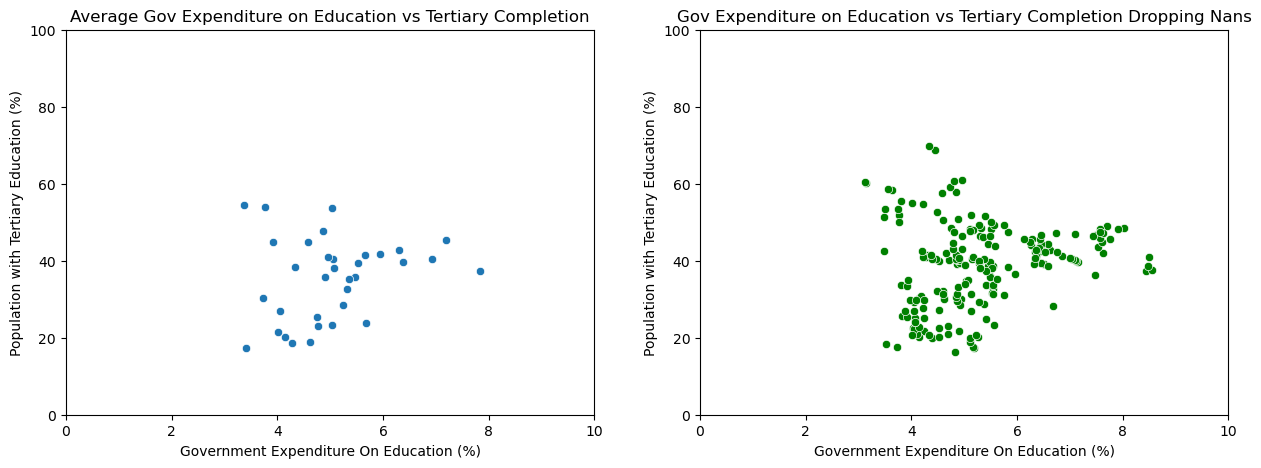

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#Plotting country_average_df
sns.scatterplot(data=country_average_df, x="Government Expenditure On Education (%)",
                           y="Population with Tertiary Education (%)", marker="o", ax=axes[0]) 
axes[0].set_title("Average Gov Expenditure on Education vs Tertiary Completion")
axes[0].set_xlim(0, 10)
axes[0].set_ylim(0,100)

#Plotting gov_tert_dropped_nan_df
sns.scatterplot(data=gov_tert_dropped_nan_df, x="Government Expenditure On Education (%)",
                           y="Population with Tertiary Education (%)", 
                marker="o", ax=axes[1], color = "green")
axes[1].set_title("Gov Expenditure on Education vs Tertiary Completion Dropping Nans")
axes[1].set_xlim(0, 10)
axes[1].set_ylim(0,100)

plt.show()

Both these graphs shows the relationship between the government expenditure on education as a percentage of total governmemt expenditures and the percentage of people who have completed tertiary education within the age group of 25-34.

The only difference between these two graphs is that one graph (the blue graph) plots the country_average_df and the other one takes out all the Nans. For the second graph (the green graph), we made a new dataframe from the dropped_nan_df and selected only the 2 variables that we are plotting.

Both of these grahs don't have an obvious trend. All the points in the graphs are scattered and there is no clear, negative or positive trend. The data distribution for both the scatterplots look very similar. The only difference lies in the fact that the `dropped_nan_df` has more data than `country_average_df`. This might indicate these 2 variables, `Government Expenditure On Education (%)` and `Population with Tertiary Education (%)`, have no linear correlation. Because of this, we will try to transform the y-variable (`Population with Tertiary Education (%)`) in order to find a relationship between the 2 variables.

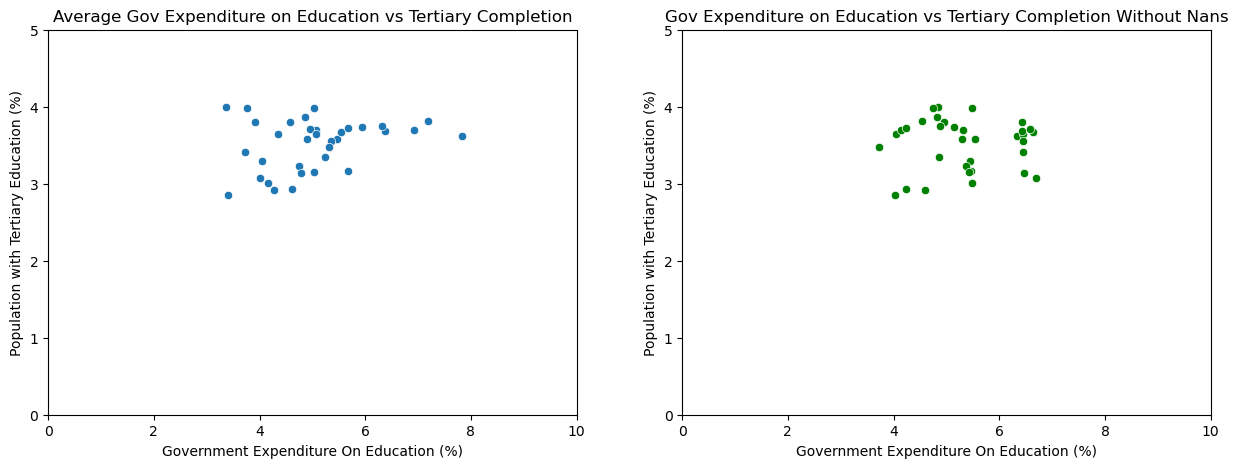

In [37]:
#Transforming the variable Population with Tertiary Education (%) by a log transformation.
log_fig, log_axes = plt.subplots(1, 2, figsize=(15, 5))

#Plotting country_average_df
log_y = np.log(country_average_df['Population with Tertiary Education (%)'])

sns.scatterplot(x = country_average_df['Government Expenditure On Education (%)'], 
                y = log_y, marker = "o", ax = log_axes[0])
log_axes[0].set_title("Average Gov Expenditure on Education vs Tertiary Completion")
log_axes[0].set_xlim(0, 10)
log_axes[0].set_ylim(0,5)

#Plotting gov_tert_dropped_nan_df
log_y2 = np.log(gov_tert_dropped_nan_df['Population with Tertiary Education (%)'])
sns.scatterplot(x = gov_tert_dropped_nan_df['Government Expenditure On Education (%)'], 
                y = log_y, marker = "o", ax = log_axes[1], color = "green")
log_axes[1].set_title("Gov Expenditure on Education vs Tertiary Completion Without Nans")
log_axes[1].set_xlim(0, 10)
log_axes[1].set_ylim(0,5)

plt.show()

Once again, we plotted the relationship between the government expenditure on education as a percentage of total governmemt expenditures and the percentage of people who have completed tertiary education within the age group of 25-34. However, this time, we did the log transformation of the y-values of both data sets in order to figure out whether there some sort of relationship or not since the graphs above showed no linear relationship. This exploratory analysis using the charts shows that government spending on education as a percentage of GDP may not be a good indicator of tertiary education levels, which provides interesting insights – if true– about the effectiveness of increasing spending towards education. 

We chose to transform the y-value only because there is a larger range of values for the y-values, while the x-values only have a range less than 10. However, this made no difference in our evaluation between the relationship between the government expenditure on education as a percentage of total government expenditures and the percentage of people who have completed tertiary education within the age group of 25-34 because these graphs also do not indicate a relationship between the variables. However, we will still use this model for the hypothesis test because this log(y) model is less randomly scattered as compared to the model with NaN rows dropped.

In [38]:
#country_average_df Linear Model Hypothesis Test

X = country_average_df[['Government Expenditure On Education (%)']].values
y = country_average_df['Population with Tertiary Education (%)'].values

model = LinearRegression().fit(X,y)

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.452
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.237
Time:                        15:35:40   Log-Likelihood:                -127.28
No. Observations:                  34   AIC:                             258.6
Df Residuals:                      32   BIC:                             261.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7184      9.019      2.741      0.0

In [39]:
#gov_tert_dropped_nan_df Linear Model Hypothesis Test

X = gov_tert_dropped_nan_df[['Government Expenditure On Education (%)']].values
y = gov_tert_dropped_nan_df['Population with Tertiary Education (%)'].values

model = LinearRegression().fit(X,y)

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     7.389
Date:                Mon, 04 Dec 2023   Prob (F-statistic):            0.00713
Time:                        15:35:40   Log-Likelihood:                -774.19
No. Observations:                 205   AIC:                             1552.
Df Residuals:                     203   BIC:                             1559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6821      3.406      8.714      0.0

The AIC helps to  evaluate how well a model fits the data it was generated from. Based on the OLS regression results of both the `country_average_df` and `gov_tert_dropped_nan_df`, the AIC value for the `gov_tert_dropped_nan_df` linear model is significantly higher than the `country_average_df` linear model. Because the lower AIC value indicates a better model, we conducted our hypothesis testing on the `country_average_df`. 

The p-value is 0.237 > 0.05. This means the p-value is not significant and we fail to reject the null hypothesis. There is not enough evidence to to say that the rate of completed higher tertiary education stays the same with higher government spending on education. 

Our initial intention of isolating this factor was because the proportion of GDP spent on education can be a good way to quantify societial emphasis on education and the amount of support students recieve. However, this finding implies that government spending on education as a percentage of GDP is not indicative of tertiary education. Two possible issues could be that government allocation towards education may not be a very good way to represent the population's opinions regarding the importance of education and/or there is at least one outlier – given that we used countries averages dataframe, which only has 34 countries due to data limitations. Because of this, we will try to find a better model using different variables in order to be indicative of tertiary education.

## Part 5.3: General Question


To find the better model, we decided to use AIC to compare all the possible models using the independent variables we have in our data frame. Below is a list of all our variables. The dataframe that we used for this analysis is the aggregated data that uses the mean value for each country across all years. To see more details on how this dataframe is generated, please refer to the appendix section for the procedure we used to generate the aggregated.

Using the AIC, we can better compare the ability of the models to predict the response value. From the formula we can see that models with a lower AIC is better because we want the model that uses the least amount of variables while having parameters that explains the data well. 

In [40]:
input_vars = ["GDP per Capita", "Population (Million)",
              "Average Spending on Higher Education (USD/student)",
              "Government Expenditure On Education (%)",
              "Government Spending Teritary (% Gov Spending)",
              "Household Income per Capita", "Number of Universities",
              "Primary Enrollment rate (% gross)", 
              "Secondary Enrollment rate (% gross)",
              "Tertiary Enrollment rate (% gross)"]

To begin our analysis, we wanted to look at how well the full model (model with all variables included) can model the data. As we previously mentioned for the preregistration 1 question, when we use the full model, the GDP is statisically insignificant and the AIC of the full model is 247.1. However, when we modeled ratio of higher education to GDP per capita and utilized a partial model, GDP per capita becomes statistically significant. We acknowledge that it may be the case that there are other variables is sharing the variance the GDP per capita is explaining. However, the AIC for the partial (GDP per capita only model) is 249.6562, which is relatively similar to that of the full model.

Although this model does result in a signficant result, the AIC value is very high and is approximately equal to the full model, which means that this model doesn't do any better in explaining the variance in y and the could be a better model. Therefore, we wrote a short function to try the combinations of the variable to find the model with the lowest AIC.

In [41]:
y = country_average_df["Population with Tertiary Education (%)"]

def bestModel(inputData, ycol = y):
    aiclist=[]
    numCol = inputData.shape[1]
    min_aic = []
    colName = inputData.columns.values.tolist()
    
    for i in range (1,numCol):
        ## As i increases, removes the variables one by one
        var_df = inputData.iloc[:,:-i]
        norm_x = Normalizer(var_df.values)
        norm_x = sm.add_constant(norm_x)
        var_model = sm.OLS(ycol, norm_x)
        var_results = var_model.fit()
        aiclist.append(var_results.aic)
        
    ## We need to add one to the index because the index returns the position of
    # the most recently dropped variable and the best model based on the 
    best_model_index = aiclist.index(np.min(aiclist)) + 1
    print ("For the pivot column",colName[0],\
           ", the model that has the smallest aic uses ", \
           colName[:-best_model_index],"\n")
    return np.min(aiclist)

In [42]:
input_vars = ["GDP per Capita", "Population (Million)",
              "Average Spending on Higher Education (USD/student)",
              "Government Expenditure On Education (%)",
              "Government Spending Teritary (% Gov Spending)",
              "Household Income per Capita", "Number of Universities",
              "Primary Enrollment rate (% gross)", 
              "Secondary Enrollment rate (% gross)",
              "Tertiary Enrollment rate (% gross)"]

The function helps us find the model scale that yields the smallest AIC, but it has a flaw in that it can only loop through the given list and delete a variable at a time. This means that there is a flaw in that we can't account for all the possible models, so we created a for loop to apply this function to take into account the ordering of the data. 

In [43]:
min_aic_list = []
y = country_average_df["Population with Tertiary Education (%)"]
for i in range (len(input_vars)):
    temp_input_vars = input_vars[i:] + input_vars[:i]
    min_aic_list.append(bestModel(country_average_df[temp_input_vars], y))
print ("The list of smallest aic for all possible models is: ", min_aic_list)
print ("The smallest AIC is", np.min(min_aic_list),"\n")

For the pivot column GDP per Capita , the model that has the smallest aic uses  ['GDP per Capita'] 

For the pivot column Population (Million) , the model that has the smallest aic uses  ['Population (Million)', 'Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)', 'Government Spending Teritary (% Gov Spending)', 'Household Income per Capita', 'Number of Universities', 'Primary Enrollment rate (% gross)', 'Secondary Enrollment rate (% gross)', 'Tertiary Enrollment rate (% gross)'] 

For the pivot column Average Spending on Higher Education (USD/student) , the model that has the smallest aic uses  ['Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)', 'Government Spending Teritary (% Gov Spending)', 'Household Income per Capita', 'Number of Universities', 'Primary Enrollment rate (% gross)', 'Secondary Enrollment rate (% gross)', 'Tertiary Enrollment rate (% gross)', 'GDP per Capita'] 

For the pivot c

As printed above, the smallest AIC is 242.5148 and it is from the model that uses `Tertiary Enrollment rate (% gross)`and `GDP per Capita`. This value for the AIC is lower than all the models we considered using the for loop and the full model, but there is not a drastic decrease in value. Therefore, although we claim that these two variables are more helpful in indicating the ratio of people of ages 24-35 that has a tertiary education, we don't have very strong evidence in support of this. One possible thing that attributes to this is because due to the amount of NaNs that was in our data, we could not use the orginal combined dataframe to have more data points. Also, since we used the dataframe that shows the average value per country and there is only 38 OECD countries, the models created were very vulnerable to any outliers and extreme values.

Therefore, we also wanted to see what the best model, according to the AIC, would be if we used a dataframe that did not aggregate data based on country but just dropped the NaN rows. 

In [44]:
input_vars = ["GDP per Capita", "Population(Million)",
              "Average Spending on Higher Education (USD/student)",
              "Government Expenditure On Education (%)",
              "Government Spending Teritary (% Gov Spending)",
              "Household Income per Capita", "Number of Universities",
              "Primary Enrollment rate (% gross)", 
              "Secondary Enrollment rate (% gross)",
              "Tertiary Enrollment rate (% gross)"]

In [45]:
min_aic_list_nan = []
y = dropped_nan_df["Population with Tertiary Education (%)"]
for i in range (len(input_vars)):
    temp_input_vars = input_vars[i:] + input_vars[:i]
    min_aic_list_nan.append(bestModel(dropped_nan_df[temp_input_vars], y))
print ("The list of smallest aic for all possible models is: ", min_aic_list_nan)
print ("The smallest AIC is", np.min(min_aic_list_nan),"\n")

For the pivot column GDP per Capita , the model that has the smallest aic uses  ['GDP per Capita', 'Population(Million)', 'Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)', 'Government Spending Teritary (% Gov Spending)', 'Household Income per Capita', 'Number of Universities', 'Primary Enrollment rate (% gross)', 'Secondary Enrollment rate (% gross)'] 

For the pivot column Population(Million) , the model that has the smallest aic uses  ['Population(Million)', 'Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)', 'Government Spending Teritary (% Gov Spending)', 'Household Income per Capita', 'Number of Universities', 'Primary Enrollment rate (% gross)', 'Secondary Enrollment rate (% gross)', 'Tertiary Enrollment rate (% gross)'] 

For the pivot column Average Spending on Higher Education (USD/student) , the model that has the smallest aic uses  ['Average Spending on Higher Education (USD/student)'

To our surprise, the model that generated the smallest AIC is the model that uses `Household Income per Capita`, `Number of Universities`, `Primary Enrollment rate (% gross)`, `Secondary Enrollment rate (% gross)`, `Tertiary Enrollment rate (% gross)`, `GDP per Capita`, `Population(Million)`, `Average Spending on Higher Education (USD/student)`, `Government Expenditure On Education (%)`, which is close to a full model but has `Government Spending Teritary (% Gov Spending)` dropped. 

The AIC values for these models are also very high as compared to the AIC values generated with the country aggregated dataframe. This make sense because the AIC penalizes the complexity of the model, since the AIC formula adds in the number of variables used. In addition, by using mean values across all years for the aggregated dataframe, we reduced the variability in the variables and that may hava also attributed to the lower AIC value.

In [46]:
inputVal = ['Household Income per Capita', 'Number of Universities', \
            'Primary Enrollment rate (% gross)', 'Secondary Enrollment rate (% gross)', \
            'Tertiary Enrollment rate (% gross)', 'GDP per Capita', 'Population(Million)', \
            'Average Spending on Higher Education (USD/student)', \
            'Government Expenditure On Education (%)'] 

X = dropped_nan_df[inputVal].values
y = dropped_nan_df['Population with Tertiary Education (%)'].values

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     27.48
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.41e-30
Time:                        15:35:40   Log-Likelihood:                -693.91
No. Observations:                 205   AIC:                             1408.
Df Residuals:                     195   BIC:                             1441.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7624     13.559      2.416      0.0

Using the best model generated by the AIC analysis we conducted in this section, we created a regression model to learn more about the significant variables. 

This regression return also confirms that there may be overlaps within our variables leading to collinearity, which can harm our analysis. This is expected because GDP per capita influences many other factors we used in our analysis and it itself depends on the population, which is another factor that we used in our analysis. However, since each factor explains something slightly different– government expenditure on education as a percentage of GDP can provide insight on the amount of resources allocated to help students complete their versus GDP per capita and Average Household Income shows more the individual household’s ability to support their child in pursuing a higher education. In the real world, the completion of tertiary education depends on both the family’s ability to support their children and the amount of government spending to help those from low-income. With this, we want to acknowledge the colinearity that exists and choose to not remove any variables from our model.


As shown above, the significant variables are: `Household Income per Capita` (x1), `Primary Enrollment rate (% gross)` (x3), `Secondary Enrollment rate (% gross)` (x4), `Tertiary Enrollment rate (% gross)` (x5), `Average Spending on Higher Education (USD/student)` (x8), and `Government Expenditure On Education (%)` (x9). 

Returning to our preregistration questions, we previously discussed how there is either weak or no evidence that GDP per capita and Government Expenditure On Education as a percentage of GDP is significant in influencing the ratio of population of ages 24-35 with a tertiary education. This deeper dive and comparison of models using the AIC also agrees with our conclusion in that with the amount of limitation in our model and the possible overlapping in our variables, with the data that we have, we can not conclude that GDP per capita and government expenditure on education has a great influence on tertiary education levels. 

Expanding our analysis to all variables we used in our data frame, there was no variable that is statistically significant in our two versions of the lowest AIC model. Therefore, although we spotted trends and correlations in our graphs, we can not conclude that any of the variables has a significant impact on the proportion of population with tertiary education.


## Part 6:  Limitations

#### Data Limitations:

We realized that our data has several limitations:
1. **Limited time span:** Our data only spans 25 years from 1995 to 2020. While it might seem long, economically, this time span might not fully account for the longer-term structural and economic changes or fluctuations that can happen in the economic system, population, education system, and more. Additionally, the data also does not account for the most recent years (2021 and 2022) too.

2. **Missing Data:** We observed a lot of missing data in our dataset and because of this we had to cut out some of the OECD countries (4 countries) and reduce the amount of years our data spans for. Some countries like Colombia only joined the OECD in 2020 and had a hard time in keeping track of all these statistics Because of this, it was hard to find consistent data for all the countries. 

3. **Variable Measurement and LimitationsL** The measurement and definitions of certain variables, particularly those related to Population (in millions) and enrollment rates, may not be uniform across all countries. There is a possibility that people in certain age ranges could be undercounted and overcounted based on their citizenship status and other factors. Variations in how indicators are defined and measured could impact the accuracy and reliability of our analyses, potentially leading to challenges in drawing precise cross-country comparisons.

4. **Delayed Response:** Since it takes time to obtain and complete a tertiary degree, the factors that would influence the results are not immediately impacting the proportion of people between the ages of 24 to 35 with tertiary education. This delayed impact on the response variable and the large amount of NaNs also contributed to our inability to find values for the parameter such that it best predicts the response value.

5. **Inability to Quantify Society and Consider the Value of Education:** Depending on the country, it will vary whether a tertiary education is necessary for most jobs and whether people actually places a heavy emphasis on obtaining a higher education. As we pointed out in the exploratory analysis, countries like Japan and South Korea who has a heavier emphasis on higher education, their levels of tertiary education completed is high despite a lower value for other factors like GDP per Capita, population, and number of universities. 

#### Model Limitations/Analysis Limitations:

Our model and analysis also has a lot of limitations:

1. **Overfitting:** A lot of our results had a noticeable increse in both MSE and RMSE when evaluation the model on the testing data. This could indicate a potential lack of generalization, meaning that the model might be overfitting to the training data since it wasn't able to generalize to new, unseen data.

2. **Small Data Set:** For our average_country_df analysis, we performed a train-test split to create a linear model. However, because our data set is small, only 35 different countries (rows), our linear model might not be accurate since we didnt have enough data to train the model on and later test it on. This model is very vulnerable to many outliers. 

3. **AIC Values Bias:** Most of our analysis for our preregistration questions and our general questions involved using the AIC values as a method of picking the best model. However, at the end, most of our results were inconclusive and we were unable to find any variables that were statistically significant in having an impact on the proportion of population with tertiary education. This could be because the AIC, itself has some limitations, especially in small sample sizes. In one of our models, country_averages_df the size of the total data set is only 35 rows, meaning it is a very small sample size. This small sample size could've affected our AIC values, enabling us to pick the wrong model when conducting the final hypothesis tests.

#### Future Implications
Acknowledging the limitations of our model and data and taking into consideration the analysis we had done, steps that can be taken to dive deeper into the factors that lead to higher education rates include:
- taking into consideration factors like data about percentage of the population that desire to obtain a tertiary degree from a population survey and average education debt per household that can better quantify a society's value for education
- using one database and perferably one data set to minize possibilities of 
- instead of limiting the analysis to a small group of countries with a specific economic characteristic, we can filter countries based on GDP (to limit the amount of null data; since many developing country often don't track and/or report data)

## Sources:

- GDP Data: https://data.oecd.org/gdp/gross-domestic-product-gdp.htm
- Population Data: https://data.oecd.org/pop/population.htm
- Average Education Spending Data: https://data.oecd.org/eduresource/education-spending.htm#indicator-chart
- Government Expenditures on Education as a percentage of GDP Data: https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?view=chart
- Government Expenditures on Tertiary Education as a Percent of the GDP Data: https://databank.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series#
- Household Income per Capita Data: https://data.oecd.org/hha/household-disposable-income.htm#indicator-chart
- Number of Universities Data: https://www.webometrics.info/en/distribution_by_country
- Enrollment Rates Data: https://ourworldindata.org/global-education
- Population completed Tertiary Education Data: https://data.oecd.org/eduatt/population-with-tertiary-education.htm


## Appendix:

In our GitHub Repository, please see 
- Data Cleaning.ipynb : for full data cleaning/collection process for combined_df
- Country Averages.ipynb : for full data cleaning process for country_average_df